In [1]:
include("../mps.jl")
using .MatrixProductState
using LinearAlgebra

using Plots

In [2]:
r_c = 14
r_r = 16

psi_complex = rand(ComplexF32, (2 for _=1:r_c)...)
psi_complex /= sqrt(abs(dot(psi_complex, conj(psi_complex))))

psi_real = rand(Float64, (2 for _=1:r_r)...)
psi_real /= norm(psi_real);

In [3]:
# TODO: update with contraction method
function mps_and_contract(psi, bond_dim)
    A_mps = contract_mps(mps(psi, bond_dim))
    return abs(dot(A_mps, conj(psi)))
end

mps_and_contract (generic function with 1 method)

Float32[1.1508391, 1.1486585, 1.1454766, 1.1406536, 1.1369319, 1.1321514, 1.1197315, 1.071833, 1.0135406, 0.999999, 0.999999, 0.999999, 0.999999]

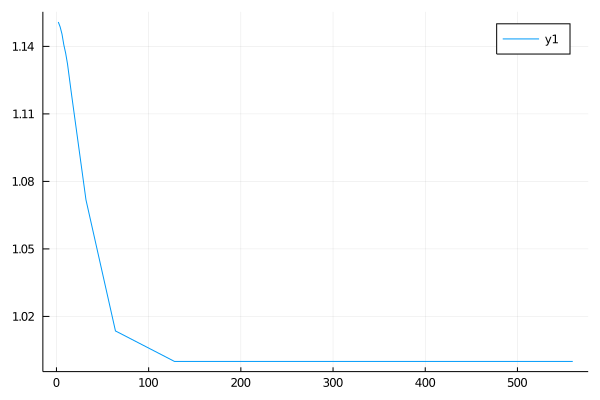

In [4]:
bond_dims = [2, 4, 6, 8, 10, 12, 16, 32, 64, 128, 256, 512, 560]
complex_fidelities = map(chi->mps_and_contract(psi_complex, chi),
                         bond_dims)
print(complex_fidelities)
plot(bond_dims, complex_fidelities) # ? 

[0.8662999834004236, 0.8666792815096066, 0.8673805649644938, 0.8683552591135201, 0.8695121002298911, 0.8707307759957402, 0.8739380412808845, 0.8915804665561256, 0.9321828630162753, 0.9865475548642686, 0.9999999999999989, 0.9999999999999989, 0.9999999999999989]

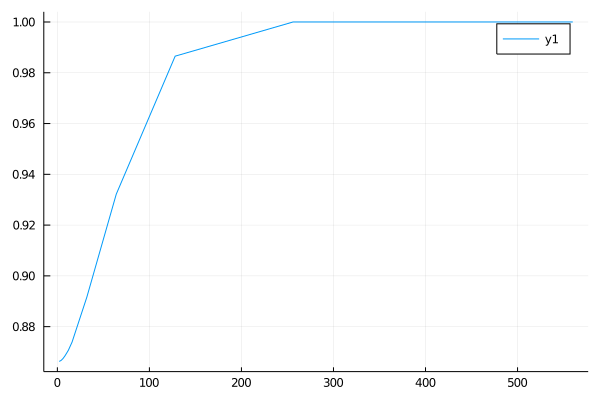

In [5]:
real_fidelities = map(chi->mps_and_contract(psi_real, chi),
                      bond_dims)
print(real_fidelities)
plot(bond_dims, real_fidelities)